In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import textstat.textstat
from Utility.plot_utility import plot_mean_bar_graph

In [2]:
def read_data(file_path):
    full_path = os.path.join('..', 'Cleaned Data', file_path)

    return pd.read_json(full_path, lines=True)

In [3]:
df1 = read_data('one/part-00000-9076dc6d-fa59-4c36-a0cf-8808e309da7b-c000.json.gz')
df2 = read_data('two/part-00000-c7cf2076-eae1-4d0c-bce1-e7b0c43a3bf1-c000.json.gz')
df3 = read_data('three/part-00000-662e59e6-5ee7-48da-a85f-1bcf09724f97-c000.json.gz')
df4 = read_data('four/part-00000-3060ac52-6be0-4d42-a322-3e4a7954a4f4-c000.json.gz')
df5 = read_data('five/part-00000-9c42996a-80d4-4a96-b59b-228f5e241a65-c000.json.gz')
df6 = read_data('six/part-00000-5da94b81-55c0-42e7-b3dc-5a51a14e8589-c000.json.gz')
df7 = read_data('seven/part-00000-eb573e13-d85e-400c-b3db-ffa9bd2d5543-c000.json.gz')
df8 = read_data('eight/part-00000-61526e86-ba2d-4df5-a9d1-d043ca875b62-c000.json.gz')
df9 = read_data('nine/part-00000-dc7c0356-fae4-47b8-a93a-f9b401cf70f0-c000.json.gz')
df10 = read_data('ten/part-00000-f3ae3925-50c4-469e-8304-6007e9b4cdab-c000.json.gz')
df11 = read_data('eleven/part-00000-2aa1781a-723e-49c4-a488-47ca50409657-c000.json.gz')
df12 = read_data('twelve/part-00000-7ff282ff-fa5e-494c-ab5c-59f07d2a2f0d-c000.json.gz')

frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
df = pd.concat(frames, ignore_index=True)

df;

In [4]:
# Useful columns are: subreddit, title, score, selftext

df.columns

Index(['name', 'downs', 'ups', 'hide_score', 'subreddit', 'locked',
       'num_comments', 'id', 'score', 'author', 'stickied', 'title',
       'selftext', 'over_18', 'thumbnail', 'gilded', 'subreddit_id', 'is_self',
       'date', 'datetime', 'word_count_self', 'word_count_title', 'preview',
       'author_flair_css_class', 'author_flair_text', 'link_flair_css_class',
       'link_flair_text'],
      dtype='object')

In [5]:
# Filter out unnecessary columns
columns = [
    'subreddit',
    'title',
    'score',
    'selftext'
]

df = df[columns]

#341418 rows
df;

In [6]:
# Filter out selftext with no words
df = df[df['selftext'].apply(lambda x: len(str(x).split()) >= 1)]

#2814 rows
df;

In [7]:
# Perform readability score

df['title_readability'] = df['title'].apply(textstat.flesch_reading_ease)
df['selftext_readability'] = df['selftext'].apply(textstat.flesch_reading_ease)

'''
Score	Difficulty
90-100	Very Easy
80-89	Easy
70-79	Fairly Easy
60-69	Standard
50-59	Fairly Difficult
30-49	Difficult
0-29	Very Confusing
'''

df['title_grade'] = df['title'].apply(textstat.dale_chall_readability_score)
df['selftext_grade'] = df['selftext'].apply(textstat.dale_chall_readability_score)

'''
Score	Understood by
4.9 or lower	average 4th-grade student or lower
5.0–5.9	average 5th or 6th-grade student
6.0–6.9	average 7th or 8th-grade student
7.0–7.9	average 9th or 10th-grade student
8.0–8.9	average 11th or 12th-grade student
9.0–9.9	average 13th to 15th-grade (college) student
'''

#2814 rows
df;

In [8]:
# Test correlation between readability scores and score
# -1 to 1 (positive/negative) & 0 indicates NO relationship 

correlations = {
    'selftext_readability': df['score'].corr(df['selftext_readability']),
    'title_readability': df['score'].corr(df['title_readability']),
    'selftext_grade': df['score'].corr(df['selftext_grade']),
    'title_grade': df['score'].corr(df['title_grade'])
}

threshold = 0.1

for column, correlation in correlations.items():
    print(f'Correlation between score and {column}: {correlation}')
    if abs(correlation) > threshold:
        print('> 0.1: There is a significant correlation.')
    else:
        print('<= 0.1: There is no significant correlation.')

Correlation between score and selftext_readability: 0.0010701822429003745
<= 0.1: There is no significant correlation.
Correlation between score and title_readability: 0.0017463878782111781
<= 0.1: There is no significant correlation.
Correlation between score and selftext_grade: 0.001418820177997236
<= 0.1: There is no significant correlation.
Correlation between score and title_grade: -0.02575265018189629
<= 0.1: There is no significant correlation.


In [9]:
'''
Note to self:

Correlation coefficients are all close to 0
Indicating there is no significant linear relationship between the score and the readability/grade of the selftext/title
'''

'\nNote to self:\n\nCorrelation coefficients are all close to 0\nIndicating there is no significant linear relationship between the score and the readability/grade of the selftext/title\n'

In [10]:
'''
Note to self:

Even after transforming...
Correlation coefficients are still all close to 0
Indicating there is no significant linear relationship between the score and the readability/grade of the selftext/title

Even though we could not find evidence to support that there is correlation between the readability and the score...
We can try to separate scores from high/low selftext readability score and perform ttest 
Test see if there is a significant difference

Ttest requires:
    1. Independent samples
    2. Normally distributed data
    3. Distributions have equal variance, or specify 'equal-var=False'
'''

"\nNote to self:\n\nEven after transforming...\nCorrelation coefficients are still all close to 0\nIndicating there is no significant linear relationship between the score and the readability/grade of the selftext/title\n\nEven though we could not find evidence to support that there is correlation between the readability and the score...\nWe can try to separate scores from high/low selftext readability score and perform ttest \nTest see if there is a significant difference\n\nTtest requires:\n    1. Independent samples\n    2. Normally distributed data\n    3. Distributions have equal variance, or specify 'equal-var=False'\n"

In [11]:
# Separte scores by low / high selftext readability

high_selftext_readability = df[df['selftext_readability']
                               > df['selftext_readability'].median()]['score']
low_selftext_readability = df[df['selftext_readability']
                              <= df['selftext_readability'].median()]['score']

# Separte scores by low / high title readability
high_title_readability = df[df['title_readability']
                            > df['title_readability'].median()]['score']
low_title_readability = df[df['title_readability']
                           <= df['title_readability'].median()]['score']

# Separte scores by low / high selftext grade
high_selftext_grade = df[df['selftext_grade']
                         > df['selftext_grade'].median()]['score']
low_selftext_grade = df[df['selftext_grade']
                        <= df['selftext_grade'].median()]['score']

# Separte scores by low / high title grade
high_title_grade = df[df['title_grade'] >
                      df['title_grade'].median()]['score']
low_title_grade = df[df['title_grade'] <=
                     df['title_grade'].median()]['score']

In [12]:
separated_scores = {
        'high_selftext_readability': high_selftext_readability,
        'low_selftext_readability':low_selftext_readability,
        'high_title_readability':high_title_readability,
        'low_title_readability':low_title_readability,
        'high_selftext_grade':high_selftext_grade,
        'low_selftext_grade':low_selftext_grade,
        'high_title_grade':high_title_grade,
        'low_title_grade':low_title_grade,
                }

separated_scores;

In [13]:
# Perform a normal test on the separated data

statistic, high_selftext_readability_p = stats.normaltest(high_selftext_readability)
statistic, low_selftext_readability_p = stats.normaltest(low_selftext_readability)
statistic, high_title_readability_p = stats.normaltest(high_title_readability)
statistic, low_title_readability_p = stats.normaltest(low_title_readability)
statistic, high_selftext_grade_p = stats.normaltest(high_selftext_grade)
statistic, low_selftext_grade_p = stats.normaltest(low_selftext_grade)
statistic, high_title_grade_p = stats.normaltest(high_title_grade)
statistic, low_title_grade_p = stats.normaltest(low_title_grade)

print(f'high_selftext_readability_p: {high_selftext_readability_p}, \n'
      f'low_selftext_readability_p: {low_selftext_readability_p}, \n'
      f'high_title_readability_p: {high_title_readability_p}, \n'
      f'low_title_readability_p: {low_title_readability_p}, \n'
      f'high_selftext_grade_p: {high_selftext_grade_p}, \n'
      f'low_selftext_grade_p: {low_selftext_grade_p}, \n'
      f'high_title_grade_p: {high_title_grade_p}, \n'
      f'low_title_grade_p: {low_title_grade_p}'
    )

# Assume this is normal enough and proceed with ttest

high_selftext_readability_p: 0.0, 
low_selftext_readability_p: 0.0, 
high_title_readability_p: 0.0, 
low_title_readability_p: 0.0, 
high_selftext_grade_p: 0.0, 
low_selftext_grade_p: 0.0, 
high_title_grade_p: 0.0, 
low_title_grade_p: 0.0


In [14]:
# Perform Ttest now that the separated data are normally distributed

'''
p-vaue: < 0.05 indicates a significant difference between the groups 
    -> 
different (high/low) readability scores make a difference in the score for Reddit submissions
'''

selftext_readability_t_statistic, selftext_readability_p_value = stats.ttest_ind(high_selftext_readability, low_selftext_readability)
print(f'T-test statistic for high/low selftext readability: {selftext_readability_t_statistic}, p-value: {selftext_readability_p_value}')

title_readability_t_statistic, title_readability_p_value = stats.ttest_ind(high_title_readability, low_title_readability)
print(f'T-test statistic for high/low title readability: {title_readability_t_statistic}, p-value: {title_readability_p_value}')

selftext_grade_t_statistic, selftext_grade_p_value = stats.ttest_ind(high_selftext_grade, low_selftext_grade)
print(f'T-test statistic for high/low selftext grade: {selftext_grade_t_statistic}, p-value: {selftext_grade_p_value}')

title_grade_t_statistic, title_grade_p_value = stats.ttest_ind(high_title_grade, low_title_grade)
print(f'T-test statistic for high/low title grade: {title_grade_t_statistic}, p-value: {title_grade_p_value}')

T-test statistic for high/low selftext readability: -4.771991161864654, p-value: 1.82499175587572e-06
T-test statistic for high/low title readability: -2.6582936509599966, p-value: 0.00785415938371161
T-test statistic for high/low selftext grade: -6.098126454228657, p-value: 1.0744917503976123e-09
T-test statistic for high/low title grade: -14.82367837226265, p-value: 1.0725311301100407e-49


In [15]:
'''
high/low selftext readability:
    There is strong evidence to suggest that the selftext readability scores for the high and low groups are significantly different

high/low title readability:
    There is strong evidence to suggest that the title readability scores for the high and low groups are significantly different
    
high/low selftext grade:
    There is strong evidence to suggest that the selftext grade scores for the high and low groups are significantly different

high/low title grade:
    There is strong evidence to suggest that the title grade scores for the high and low groups are significantly different
'''

'\nhigh/low selftext readability:\n    There is strong evidence to suggest that the selftext readability scores for the high and low groups are significantly different\n\nhigh/low title readability:\n    There is strong evidence to suggest that the title readability scores for the high and low groups are significantly different\n    \nhigh/low selftext grade:\n    There is strong evidence to suggest that the selftext grade scores for the high and low groups are significantly different\n\nhigh/low title grade:\n    There is strong evidence to suggest that the title grade scores for the high and low groups are significantly different\n'

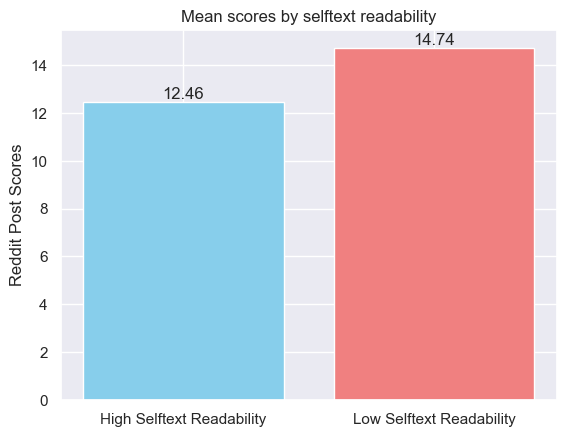

In [16]:
# Plot mean scores of high/low selftext readability
plot_mean_bar_graph(separated_scores['high_selftext_readability'],
                    separated_scores['low_selftext_readability'], 
                    'Mean scores by selftext readability', 
                    ['High Selftext Readability', 'Low Selftext Readability'], 
                    'Reddit Post Scores', 
                    '../Graphs/selftext_readability_bar.png')

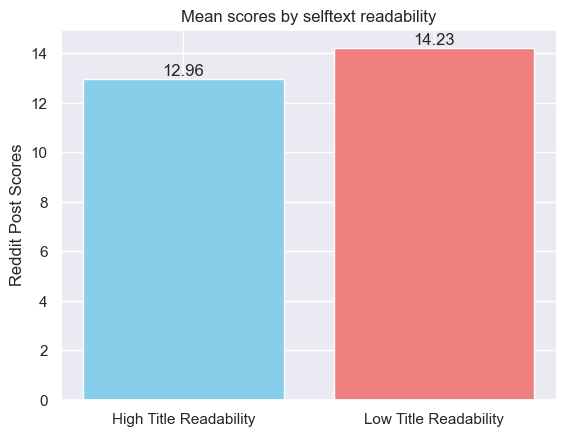

In [17]:
# Plot mean scores of high/low title readability
plot_mean_bar_graph(separated_scores['high_title_readability'],
                    separated_scores['low_title_readability'], 
                    'Mean scores by selftext readability', 
                    ['High Title Readability', 'Low Title Readability'], 
                    'Reddit Post Scores', 
                    '../Graphs/title_readability_bar.png')

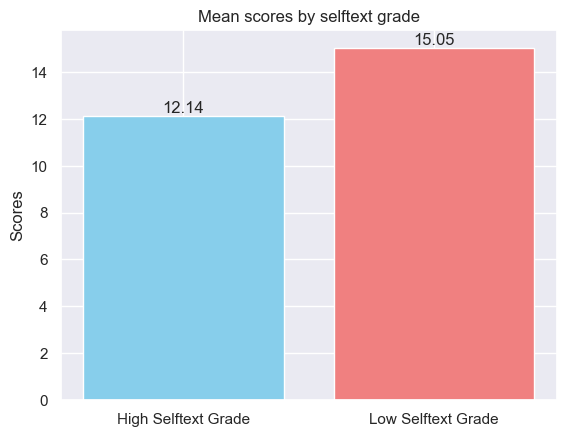

In [18]:
# Plot mean scores of high/low selftext grade
plot_mean_bar_graph(separated_scores['high_selftext_grade'],
                    separated_scores['low_selftext_grade'], 
                    'Mean scores by selftext grade', 
                    ['High Selftext Grade', 'Low Selftext Grade'], 
                    'Scores', 
                    '../Graphs/selftext_grade_bar.png')

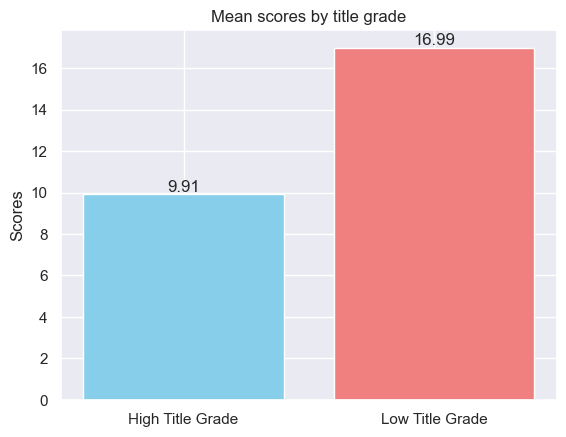

In [19]:
# Plot mean scores of high/low title grade
plot_mean_bar_graph(separated_scores['high_title_grade'],
                    separated_scores['low_title_grade'], 
                    'Mean scores by title grade', 
                    ['High Title Grade', 'Low Title Grade'], 
                    'Scores', 
                    '../Graphs/title_grade_bar.png')